# 精准率和召回率曲线

In [1]:
import numpy as np
from sklearn.datasets import load_digits

In [2]:
digits=load_digits()

X=digits.data
y=digits.target

y[y!=9]=0
y[y==9]=1

In [3]:
y[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train,X_test,y_train,y_test=train_test_split(X,y, random_state=666)

In [6]:
X_train.shape

(1347, 64)

In [7]:
from sklearn.linear_model import LogisticRegression

In [8]:
log_reg=LogisticRegression()

log_reg.fit(X_train, y_train)

log_reg.score(X_test, y_test)

y_predict=log_reg.predict(X_test)

In [9]:
decision_score=log_reg.decision_function(X_test)

In [10]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

thresholds = np.arange(np.min(decision_score), np.max(decision_score), 0.1)

precision_scores=[]
recall_scores=[]

for i in range(len(thresholds)):
    y_predict_i= np.array(decision_score>=thresholds[i], dtype='int')
    precision_scores.append(precision_score(y_test, y_predict_i))
    recall_scores.append(recall_score(y_test, y_predict_i))

In [11]:
precision_scores[:10]

[0.10000000000000001,
 0.10022271714922049,
 0.10022271714922049,
 0.10022271714922049,
 0.10022271714922049,
 0.10022271714922049,
 0.10044642857142858,
 0.10044642857142858,
 0.10044642857142858,
 0.10044642857142858]

In [12]:
recall_scores[:10]

[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]

In [13]:
import matplotlib.pyplot as plt

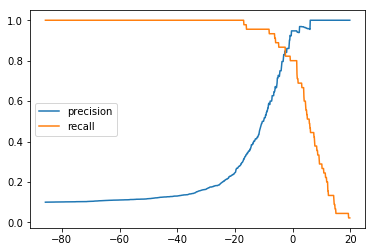

In [15]:
plt.plot(thresholds, precision_scores, label='precision')
plt.plot(thresholds, recall_scores, label='recall')
plt.legend()
plt.show()

# Precision-Recall 曲线

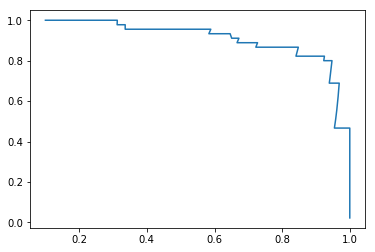

In [16]:
plt.plot(precision_scores, recall_scores)
plt.show()

## 从上图可以看出，随着precision的增大，recall逐渐减小。

## 当precision增大到某个值的时候，recall急剧地下降。

## 因此，可以认为这个点与阈值相关

## sklearn中的precision-recall曲线

In [17]:
from sklearn.metrics import precision_recall_curve

In [22]:
precisions, recalls, thresholds2= precision_recall_curve(y_test, decision_score)

In [24]:
precisions.shape

(145,)

In [25]:
recalls.shape

(145,)

In [26]:
thresholds2.shape

(144,)

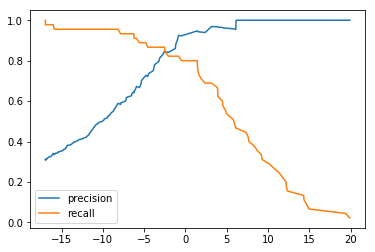

In [27]:
plt.plot(thresholds2, precisions[:-1], label='precision')
plt.plot(thresholds2, recalls[:-1], label='recall')
plt.legend()
plt.show()

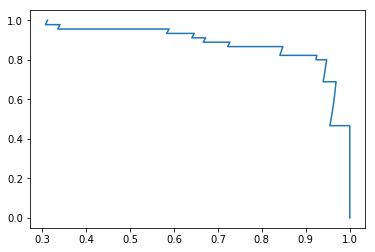

In [28]:
plt.plot(precisions, recalls)
plt.show()